In [1]:
import sys

sys.path.append("..")
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import logging
from dory.clustering.kmeans import KMeans
from dory.scorer.davies_bouldin import davies_bouldin_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans as SKLearnKMeans

logging.basicConfig(level=logging.INFO)

In [2]:
df = pd.read_csv("quake.csv", header=None)
print(df.describe())

                 0            1
count  2178.000000  2178.000000
mean      7.961997    54.914835
std      30.545583   118.875581
min     -66.490000  -179.960000
25%     -12.432500   -67.782500
50%       0.210000   122.100000
75%      36.480000   146.860000
max      78.150000   180.000000


In [3]:
scaler = StandardScaler()
X = df.to_numpy()
X_scaled = scaler.fit_transform(X)

In [4]:
random_state = 420


dbi_scores = []
sklearn_dbi_scores = []

min_k = 4
max_k = 20
k_values = range(min_k, max_k + 1)

In [5]:
for k in k_values:
    euclidian_kmeans = KMeans(random_state=random_state)
    euclidian_kmeans.set_params(n_clusters=k)
    euclidian_kmeans.fit(X_scaled)
    score = davies_bouldin_scorer("euclidean")(X_scaled, euclidian_kmeans.labels_)
    dbi_scores.append(score)
    logging.info(f"Calculated DBI for k={k}: {score} for custom KMeans")

    sklearn_kmeans = SKLearnKMeans(n_clusters=k, random_state=random_state)
    sklearn_kmeans.fit(X_scaled)
    sklearn_labels = sklearn_kmeans.labels_
    score = davies_bouldin_scorer("euclidean")(X_scaled, sklearn_labels)
    sklearn_dbi_scores.append(score)
    logging.info(f"Calculated DBI for k={k}: {sklearn_dbi_scores[-1]} for SKLearn KMeans")

INFO:root:Calculated DBI for k=4: 0.5967974949830196 for custom KMeans
INFO:root:Calculated DBI for k=4: 0.6134768402375081 for SKLearn KMeans
INFO:root:Calculated DBI for k=5: 0.711693480212169 for custom KMeans
INFO:root:Calculated DBI for k=5: 0.6886153552313993 for SKLearn KMeans
INFO:root:Calculated DBI for k=6: 0.5591637821404927 for custom KMeans
INFO:root:Calculated DBI for k=6: 0.7994856014767923 for SKLearn KMeans
INFO:root:Calculated DBI for k=7: 0.7321961022630923 for custom KMeans
INFO:root:Calculated DBI for k=7: 0.8479523822060246 for SKLearn KMeans
INFO:root:Calculated DBI for k=8: 0.6577094390811683 for custom KMeans
INFO:root:Calculated DBI for k=8: 0.7529166745070148 for SKLearn KMeans
INFO:root:Calculated DBI for k=9: 0.643726563922768 for custom KMeans
INFO:root:Calculated DBI for k=9: 0.7891466191266503 for SKLearn KMeans
INFO:root:Calculated DBI for k=10: 0.6108467483255824 for custom KMeans
INFO:root:Calculated DBI for k=10: 0.6139965917341206 for SKLearn KMeans

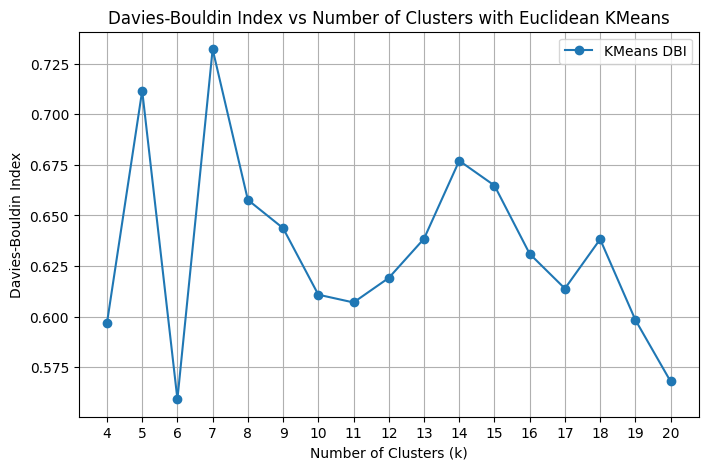

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, dbi_scores, marker="o", label="KMeans DBI")
# plt.plot(k_values, sklearn_dbi_scores, marker="x", label="SKLearn KMeans DBI")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Davies-Bouldin Index")
plt.title("Davies-Bouldin Index vs Number of Clusters with Euclidean KMeans")
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

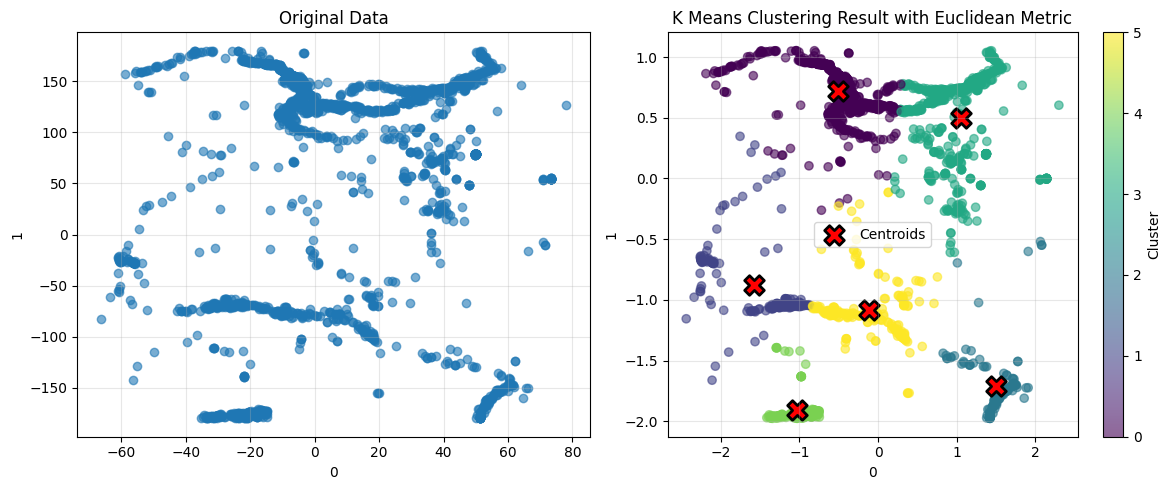

In [7]:
best_n_clusters = k_values[np.argmin(dbi_scores)]
predictor = KMeans(random_state=random_state, n_clusters=best_n_clusters, metric="euclidean")
predictor.fit(X_scaled)
labels = predictor.labels_

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], alpha=0.6)
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.title("Original Data")
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, alpha=0.6)
plt.scatter(
    predictor.cluster_centers_[:, 0],
    predictor.cluster_centers_[:, 1],
    c="red",
    marker="X",
    s=200,
    edgecolors="black",
    linewidths=2,
    label="Centroids",
)
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.title("K Means Clustering Result with Euclidean Metric")
plt.colorbar(scatter, label="Cluster")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [8]:
dbi_scores = []

for k in k_values:
    euclidian_kmeans = KMeans(random_state=random_state, metric="mahalanobis")
    euclidian_kmeans.set_params(n_clusters=k)
    euclidian_kmeans.fit(X_scaled)
    score = davies_bouldin_scorer("mahalanobis")(X_scaled, euclidian_kmeans.labels_)
    dbi_scores.append(score)
    logging.info(f"Calculated DBI for k={k}: {score} for custom KMeans")

INFO:root:Calculated DBI for k=4: 0.588743921136357 for custom KMeans
INFO:root:Calculated DBI for k=5: 0.7432505477261195 for custom KMeans
INFO:root:Calculated DBI for k=6: 0.7393229173114159 for custom KMeans
INFO:root:Calculated DBI for k=7: 0.812207999246639 for custom KMeans
INFO:root:Calculated DBI for k=8: 0.7044532017620586 for custom KMeans
INFO:root:Calculated DBI for k=9: 0.6509943624104717 for custom KMeans
INFO:root:Calculated DBI for k=10: 0.6725059127719812 for custom KMeans
INFO:root:Calculated DBI for k=11: 0.6279951336000607 for custom KMeans
INFO:root:Calculated DBI for k=12: 0.6501648639854175 for custom KMeans
INFO:root:Calculated DBI for k=13: 0.6428943824972048 for custom KMeans
INFO:root:Calculated DBI for k=14: 0.6404156657239318 for custom KMeans
INFO:root:Calculated DBI for k=15: 0.6675562984600983 for custom KMeans
INFO:root:Calculated DBI for k=16: 0.6888045674103774 for custom KMeans
INFO:root:Calculated DBI for k=17: 0.679259789588527 for custom KMeans
I

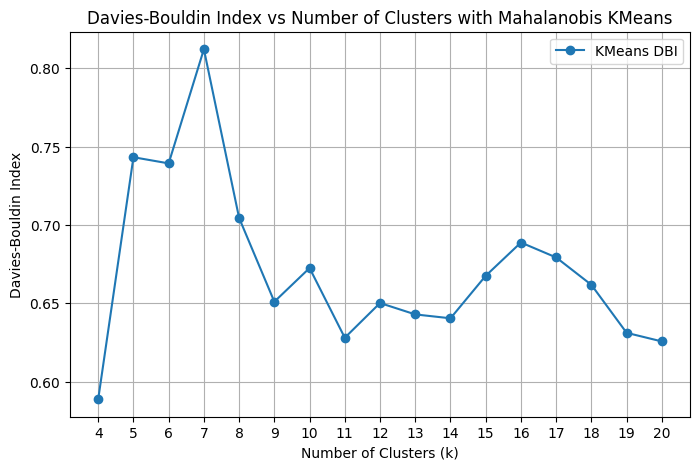

In [9]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, dbi_scores, marker="o", label="KMeans DBI")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Davies-Bouldin Index")
plt.title("Davies-Bouldin Index vs Number of Clusters with Mahalanobis KMeans")
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

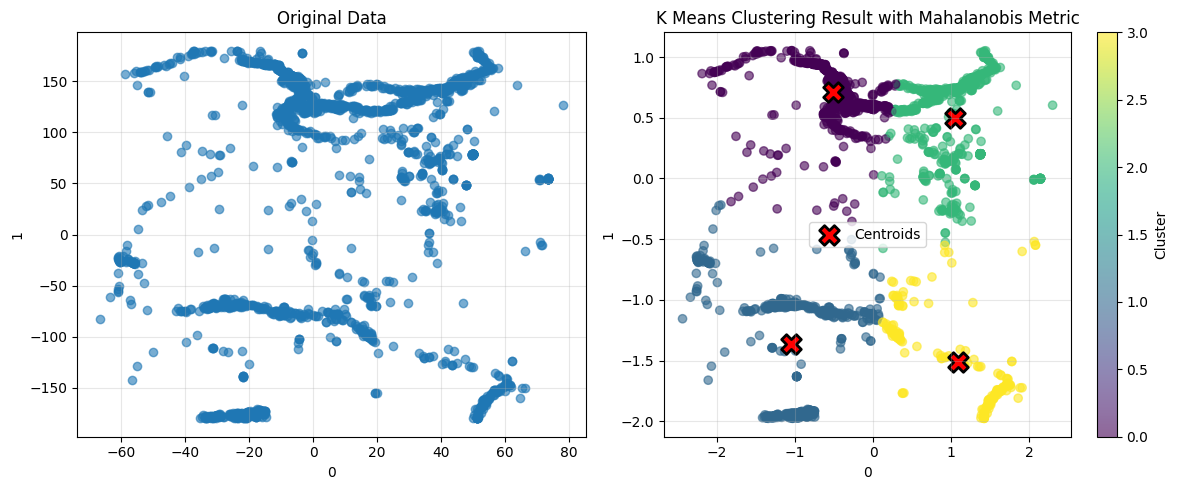

In [10]:
best_n_clusters =  k_values[np.argmin(dbi_scores)]
predictor = KMeans(random_state=random_state, n_clusters=best_n_clusters, metric="mahalanobis")
predictor.fit(X_scaled)
labels = predictor.labels_

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], alpha=0.6)
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.title("Original Data")
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, alpha=0.6)
plt.scatter(
    predictor.cluster_centers_[:, 0],
    predictor.cluster_centers_[:, 1],
    c="red",
    marker="X",
    s=200,
    edgecolors="black",
    linewidths=2,
    label="Centroids",
)
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.title("K Means Clustering Result with Mahalanobis Metric")
plt.colorbar(scatter, label="Cluster")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
